In [2]:
import tensorcircuit as tc
import jax as jax

Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
K=tc.set_backend("jax")

@K.jit 

def sam(key):
    K.set_random_state(key)
    n=50
    c=tc.Circuit(n)

    for i in range(n):
        c.H(i) 
    return c.perfect_sampling() 
sam(jax.random.PRNGKey(42))
sam(jax.random.PRNGKey(43))

optax not installed, `optimizer` from jax backend cannot work


(Array([1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.],      dtype=float32),
 Array(8.881782e-16, dtype=float32))

In [12]:
n=2
c=tc.Circuit(n,inputs=tc.backend.eye(2**n))

c.X(1)

tc.backend.reshapem(c.state())

Array([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]], dtype=complex64)

In [13]:
circ=c.to_qiskit()

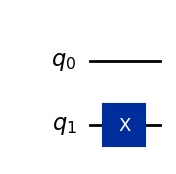

In [14]:
circ.draw(output="mpl")

In [15]:
c=tc.Circuit(2) 
c.cnot(0,1)
c.crx(1,0,theta=0.2)
c.to_qir()

[{'gatef': cnot,
  'gate': Gate(
      name: 'cnot',
      tensor:
          Array([[[[1.+0.j, 0.+0.j],
                   [0.+0.j, 0.+0.j]],
          
                  [[0.+0.j, 1.+0.j],
                   [0.+0.j, 0.+0.j]]],
          
          
                 [[[0.+0.j, 0.+0.j],
                   [0.+0.j, 1.+0.j]],
          
                  [[0.+0.j, 0.+0.j],
                   [1.+0.j, 0.+0.j]]]], dtype=complex64),
      edges: [
          Edge('crx'[3] -> 'cnot'[0] ),
          Edge('crx'[2] -> 'cnot'[1] ),
          Edge('cnot'[2] -> 'qb-0'[0] ),
          Edge('cnot'[3] -> 'qb-1'[0] )
      ]),
  'index': (0, 1),
  'name': 'cnot',
  'split': None,
  'mpo': False},
 {'gatef': crx,
  'index': (1, 0),
  'name': 'crx',
  'split': None,
  'mpo': False,
  'parameters': {'theta': 0.2},
  'gate': Gate(
      name: 'crx',
      tensor:
          Array([[[[1.       +0.j        , 0.       +0.j        ],
                   [0.       +0.j        , 0.       +0.j        ]],
          

In [16]:
def noisecircuit(random):
    c=tc.Circuit(1)
    c.x(0)
    c.thermalrelaxation(
        0,
        t1=300,
        t2=400,
        time=1000,
        method="ByChoi",
        excitedstatepopulation=0,
        status=random,
    )
    return c.expectation_ps(z=[0])
K=tc.set_backend("tensorflow")
noisec_vmap=K.jit(K.vmap(noisecircuit,vectorized_argnums=0))

nmc=1000
random=K.implicit_randu(nmc)
valuemc=K.mean(K.numpy(noisec_vmap(random)))

In [20]:
print(valuemc)

tf.Tensor((0.93+0j), shape=(), dtype=complex64)


$\textbf{Ising Type Hamiltonians Library}$

In [5]:
c=tc.Circuit(4)
c=tc.templates.blocks.example_block(c,tc.backend.ones([16]))

In [9]:
from functools import partial
import inspect
import sys
import numpy as np
import tensorflow as tf

import tensorcircuit as tc

In [12]:
def get_circuit(n):
    c=tc.Circuit(n)
    for i in range(n):
        c.H(i)
    c.cnot(0,1)
    c.CNOT(n-1,n-2)
    return c
print("Accepted gates: ")
print(*tc.Circuit.sgates,sep="\n")

Accepted gates: 
i
x
y
z
h
t
s
td
sd
wroot
cnot
cz
swap
cy
ox
oy
oz
toffoli
fredkin


In [14]:
for g in tc.Circuit.sgates:
    gf=getattr(tc.gates,g)
    print(g)
    print(tc.gates.matrix_for_gate(gf()))

i
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
x
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
y
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
z
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
h
[[ 0.70710677+0.j  0.70710677+0.j]
 [ 0.70710677+0.j -0.70710677+0.j]]
t
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710677+0.70710677j]]
s
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
td
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710677-0.70710677j]]
sd
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]
wroot
[[ 0.70710677+0.j  -0.5       -0.5j]
 [ 0.5       -0.5j  0.70710677+0.j ]]
cnot
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
cz
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
swap
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
cy
[[1.+0.j 

In [15]:
c=get_circuit(3) 
ir=c.to_qir()
ir

[{'gatef': h,
  'gate': Gate(
      name: 'h',
      tensor:
          Array([[ 0.70710677+0.j,  0.70710677+0.j],
                 [ 0.70710677+0.j, -0.70710677+0.j]], dtype=complex64),
      edges: [
          Edge('cnot'[2] -> 'h'[0] ),
          Edge('h'[1] -> 'qb-0'[0] )
      ]),
  'index': (0,),
  'name': 'h',
  'split': None,
  'mpo': False},
 {'gatef': h,
  'gate': Gate(
      name: 'h',
      tensor:
          Array([[ 0.70710677+0.j,  0.70710677+0.j],
                 [ 0.70710677+0.j, -0.70710677+0.j]], dtype=complex64),
      edges: [
          Edge('cnot'[3] -> 'h'[0] ),
          Edge('h'[1] -> 'qb-1'[0] )
      ]),
  'index': (1,),
  'name': 'h',
  'split': None,
  'mpo': False},
 {'gatef': h,
  'gate': Gate(
      name: 'h',
      tensor:
          Array([[ 0.70710677+0.j,  0.70710677+0.j],
                 [ 0.70710677+0.j, -0.70710677+0.j]], dtype=complex64),
      edges: [
          Edge('cnot'[2] -> 'h'[0] ),
          Edge('h'[1] -> 'qb-2'[0] )
      ]),
  'index':

In [16]:
ir[0]["gatef"]().tensor,ir[-1]["gate"].tensor

(Array([[ 0.70710677+0.j,  0.70710677+0.j],
        [ 0.70710677+0.j, -0.70710677+0.j]], dtype=complex64),
 Array([[[[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j]],
 
         [[0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j]]],
 
 
        [[[0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
 
         [[0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j]]]], dtype=complex64))

In [17]:
c.state()

Array([0.35355335+0.j, 0.35355335+0.j, 0.35355335+0.j, 0.35355335+0.j,
       0.35355335+0.j, 0.35355335+0.j, 0.35355335+0.j, 0.35355335+0.j],      dtype=complex64)

In [20]:
x1=c.expectation([tc.gates.x(),[1]])

z1z2=c.expectation([tc.gates.z(),[1]],[tc.gates.z(),[2]])

print(x1,z1z2)

for _ in range (10):
    print(c.perfect_sampling())

(0.9999998+0j) 0j
(Array([1., 0., 1.], dtype=float32), Array(0.12499998, dtype=float32))
(Array([1., 0., 0.], dtype=float32), Array(0.12499998, dtype=float32))
(Array([0., 1., 0.], dtype=float32), Array(0.12499998, dtype=float32))
(Array([1., 1., 0.], dtype=float32), Array(0.12499998, dtype=float32))
(Array([1., 1., 1.], dtype=float32), Array(0.12500021, dtype=float32))
(Array([0., 1., 1.], dtype=float32), Array(0.12499998, dtype=float32))
(Array([1., 0., 1.], dtype=float32), Array(0.12499998, dtype=float32))
(Array([0., 1., 1.], dtype=float32), Array(0.12499998, dtype=float32))
(Array([1., 1., 0.], dtype=float32), Array(0.12499998, dtype=float32))
(Array([1., 1., 0.], dtype=float32), Array(0.12499998, dtype=float32))


In [22]:
'''
Parameterized Quantum Circuit
''' 

print(tc.Circuit.vgates)

['r', 'cr', 'u', 'cu', 'rx', 'ry', 'rz', 'phase', 'rxx', 'ryy', 'rzz', 'cphase', 'crx', 'cry', 'crz', 'orx', 'ory', 'orz', 'iswap', 'any', 'exp', 'exp1']


In [24]:
for g in tc.Circuit.vgates:
    print(g,":",inspect.signature(getattr(tc.gates,g).f))

r : (theta: float = 0, alpha: float = 0, phi: float = 0) -> tensorcircuit.gates.Gate
cr : (theta: float = 0, alpha: float = 0, phi: float = 0) -> tensorcircuit.gates.Gate
u : (theta: float = 0, phi: float = 0, lbd: float = 0) -> tensorcircuit.gates.Gate
cu : (*args: Any, **kws: Any) -> Any
rx : (theta: float = 0) -> tensorcircuit.gates.Gate
ry : (theta: float = 0) -> tensorcircuit.gates.Gate
rz : (theta: float = 0) -> tensorcircuit.gates.Gate
phase : (theta: float = 0) -> tensorcircuit.gates.Gate
rxx : (*, unitary: Any = array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]]), theta: float, half: bool = True, name: str = 'none') -> tensorcircuit.gates.Gate
ryy : (*, unitary: Any = array([[ 0.+0.j,  0.-0.j,  0.-0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.-0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.-0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]), theta: float, half: bool = True, name: str = 'none') -> tensorcircuit.gates.Gate
rz

In [25]:
def get_circuit(n,params):
    c=tc.Circuit(n)
    for i in range (n): 
        c.rx(i,theta=params[i])
    c.cnot(0,1)
    return c 

In [26]:
K=tc.set_backend("tensorflow")
n=3
params=K.ones([n])
c=get_circuit(n,params)
print(c.state())

tf.Tensor(
[ 0.6758712 +0.j          0.        -0.36923012j  0.        -0.36923015j
 -0.20171136+0.j         -0.20171136+0.j          0.        +0.11019541j
  0.        -0.36923015j -0.20171136+0.j        ], shape=(8,), dtype=complex64)


In [27]:
ir=c.to_qir()
ir

[{'gatef': rx,
  'index': (0,),
  'name': 'rx',
  'split': None,
  'mpo': False,
  'parameters': {'theta': <tf.Tensor: shape=(), dtype=complex64, numpy=(1+0j)>},
  'gate': Gate(
      name: 'rx',
      tensor:
          <tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
          array([[0.87758255+0.j        , 0.        -0.47942555j],
                 [0.        -0.47942555j, 0.87758255+0.j        ]], dtype=complex64)>,
      edges: [
          Edge('cnot'[2] -> 'rx'[0] ),
          Edge('rx'[1] -> 'qb-0'[0] )
      ])},
 {'gatef': rx,
  'index': (1,),
  'name': 'rx',
  'split': None,
  'mpo': False,
  'parameters': {'theta': <tf.Tensor: shape=(), dtype=complex64, numpy=(1+0j)>},
  'gate': Gate(
      name: 'rx',
      tensor:
          <tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
          array([[0.87758255+0.j        , 0.        -0.47942555j],
                 [0.        -0.47942555j, 0.87758255+0.j        ]], dtype=complex64)>,
      edges: [
          Edge('cnot'[3] -> 'rx'[0

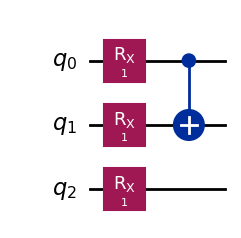

In [28]:
circ=c.to_qiskit()
circ.draw(output="mpl")